In [473]:
#import
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

# 사진 가져오기

In [474]:
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/image1.png') #os.path.expanduser() 함수를 사용하여 ~를 홈 디렉토리 경로로 변환
img_bgr = cv2.imread(my_image_path)    # OpenCV
img_show = img_bgr.copy()      #이미지카피

# 박스영역

In [475]:
def box(img, test=True):
    detector_hog = dlib.get_frontal_face_detector()
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #bgr 이미지를 rgb로 변환
    dlib_rects = detector_hog(img_rgb, 1)
    
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
    #test값이 True올 때만 이미지 출력
    if(test == True):
        img_show_rgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()
    return dlib_rects

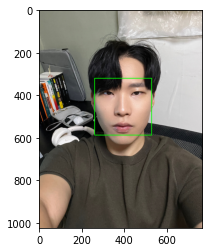

In [476]:
dlib_rects = box(img_show)

In [477]:
model_path = '~/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
model_path = os.path.expanduser(model_path) #os.path.expanduser() 함수를 사용하여 ~를 홈 디렉토리 경로로 변환
landmark_predictor = dlib.shape_predictor(model_path)

# 랜드마크 검출

68
(392, 476)
(x,y) : (392,342)
(w,h) : (268,268)


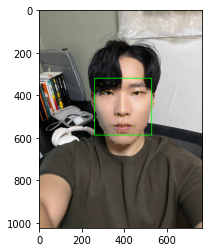

In [478]:
def get_landmark(dlib_rects,img,test=True):
    list_landmarks = []

    for dlib_rect in dlib_rects:
        points = landmark_predictor(img, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    print(len(list_landmarks[0]))
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
        print (landmark[30]) # 코의 index는 30 입니다
        x = landmark[30][0] # 이미지에서 코 부위의 x값
        y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
        w = h = dlib_rect.width() #얼굴가로역영
        print (f'(x,y) : ({x},{y})')
        print (f'(w,h) : ({w},{h})')
    
     #test값이 True올 때만 이미지 출력
    if(test==True):
        for landmark in list_landmarks:
            for point in landmark:
                cv2.circle(img, point, 2, (0, 255, 255), -1)
        img_show_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show_rgb)
        plt.show()
    
    return landmark,w,h


landmark,w,h= get_landmark(dlib_rects,img_show)
# w, h 스티커 width, height
#landmark : point

# 스티커 이미지

In [479]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png' # 왕관 이미지의 경로
img_sticker1 = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker1 = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(268, 268, 3)


### 스티커 이미지 좌표

In [480]:
#사작좌표를 코 위치 - (사진의 x,y 길이의 /2)로 함 
sticker_area = img_show[landmark[30][1]-img_sticker.shape[1]//2:landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2, landmark[30][0]-img_sticker.shape[0]//2:landmark[30][0]+img_sticker.shape[1]-img_sticker.shape[0]//2]

img_show[landmark[30][1]-img_sticker.shape[1]//2:landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2, landmark[30][0]-img_sticker.shape[0]//2:landmark[30][0]+img_sticker.shape[1]-img_sticker.shape[0]//2] =\
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

### 이미지 적용|

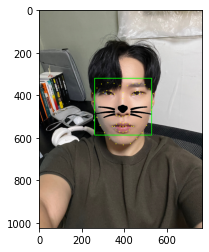

In [481]:
sticker_area = img_show[landmark[30][1]-img_sticker.shape[1]//2:landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2, landmark[30][0]-img_sticker.shape[0]//2:landmark[30][0]+img_sticker.shape[1]-img_sticker.shape[0]//2]

img_show[landmark[30][1]-img_sticker.shape[1]//2:landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2, landmark[30][0]-img_sticker.shape[0]//2:landmark[30][0]+img_sticker.shape[1]-img_sticker.shape[0]//2] =\
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 문제점 찾아보기

## 명암차이

### 새로운 이미지 가져오기

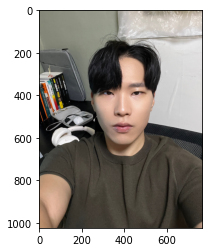

In [482]:
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/image1.png') #os.path.expanduser() 함수를 사용하여 ~를 홈 디렉토리 경로로 변환
img_bgr_2 = cv2.imread(my_image_path)    # OpenCV
img_show_2 = img_bgr.copy()

img_show_rgb =  cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()

### 명암조절

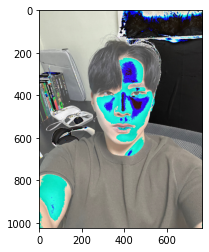

In [483]:
value = 70  # 밝기 조절 값 (양수: 밝게, 음수: 어둡게)
img_bgr_2[:, :, :] += value  # 모든 채널에 value 값을 더합니다.
img_show_rgb_2 =  cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_2) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()

### 박스영역

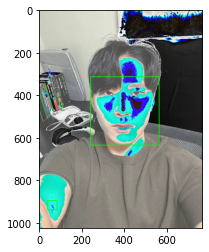

In [484]:
dlib_rects = box(img_bgr_2)

In [485]:
dlib_rects

rectangles[[(40, 895) (84, 938)], [(241, 313) (562, 634)]]

### landmark

68
(64, 911)
(x,y) : (64,889)
(w,h) : (45,45)
(387, 483)
(x,y) : (387,322)
(w,h) : (322,322)


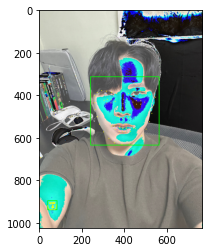

In [486]:
landmark,w,h= get_landmark(dlib_rects,img_bgr_2)

명암 조절을 한 사진에는 bounding box와 landmark가 잘 출력되는 모습

# 좌측을 보는 사진

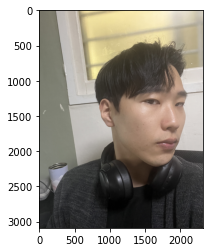

In [487]:
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/IMG_2121.png') #os.path.expanduser() 함수를 사용하여 ~를 홈 디렉토리 경로로 변환
img_bgr_2 = cv2.imread(my_image_path)    # OpenCV
img_show_2 = img_bgr.copy()

img_show_rgb =  cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()

### 박스영역

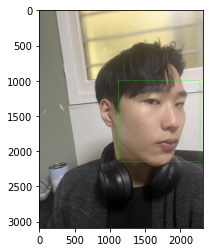

In [488]:
dlib_rects = box(img_bgr_2)

68
(1936, 1612)
(x,y) : (1936,1037)
(w,h) : (1151,1151)


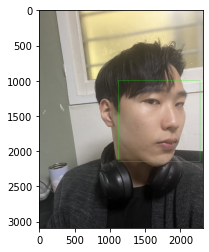

In [489]:
landmark,w,h= get_landmark(dlib_rects,img_bgr_2)

좌측을 보는 사진도 얼굴 인식이 잘 되는 것을 확인